In [45]:
import numpy as np
import pylab as pl
%pylab inline
from sklearn.datasets import make_classification
from sklearn.neighbors import LocalOutlierFactor

Populating the interactive namespace from numpy and matplotlib


In [46]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=2,
                           n_clusters_per_class=2, flip_y=0.1, class_sep=2, random_state=0)

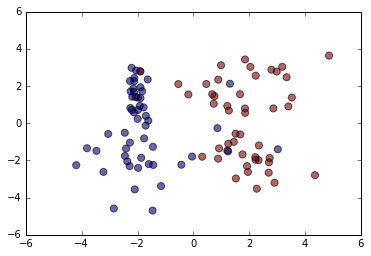

In [47]:
pl.scatter(X[:, 0], X[:, 1], c=y, s=50, alpha=0.6)

In [48]:
X0=X[y==0,:]
X1=X[y==1,:]

In [49]:
def outliers_det(X):
    LOF = LocalOutlierFactor()
    is_inl=LOF.fit_predict(X)
    return is_inl
    

In [50]:
X0_=X0[outliers_det(X0)==1,:]
X1_=X1[outliers_det(X1)==1,:]
X_ = np.vstack([X0_, X1_])
print X_.shape
y_ = np.hstack([np.zeros(X0_.shape[0]), np.ones(X1_.shape[0])])
print y_.shape

(89, 2)
(89,)


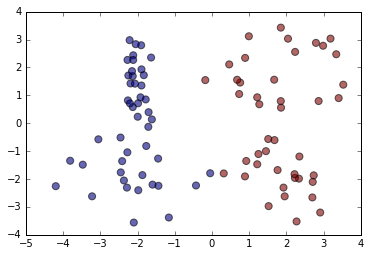

In [51]:
pl.scatter(X_[:, 0], X_[:, 1], c=y_, s=50, alpha=0.6)

In [68]:
X0, y0 = make_classification(n_samples=200, n_features=25, n_informative=4,
                           n_redundant=4, n_repeated=0, n_classes=2,
                           n_clusters_per_class=2, flip_y=0, class_sep=2, random_state=0)
X=X0[:100,:]
X_ts=X0[100:,:]
y=y0[:100]
y_ts=y0[100:]


In [69]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV
svc = SVC(kernel="linear")
rfecv = RFECV(estimator=svc, step=1, cv=5,
              scoring='accuracy')
rfecv.fit(X, y)

RFECV(cv=5,
   estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
   n_jobs=1, scoring='accuracy', step=1, verbose=0)

Optimal number of features : 4


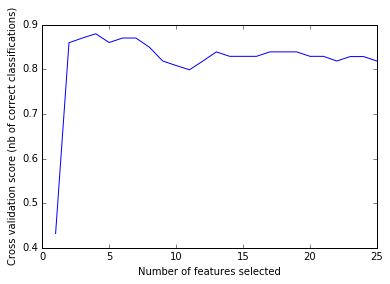

In [70]:
print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [71]:
X_=X[:,rfecv.ranking_==1]
print X_.shape

(100, 4)


In [74]:
svc.fit(X,y)
y_pr=svc.predict(X_ts)
from sklearn.metrics import accuracy_score
print accuracy_score(y_ts,y_pr)


0.78


In [73]:
svc.fit(X_,y)
y_ts_pr=svc.predict(X_ts[:,rfecv.ranking_==1])
print accuracy_score(y_ts,y_ts_pr)


0.89
